# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics
import matplotlib.colors
import seaborn as sns
import copy


df = pd.read_csv('/Users/vickichen/Desktop/W08PROJECT/mini-project-IV/data/data.csv') 
df.head()
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
data=copy.deepcopy(df)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [57]:
data.columns[data.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Look at some basic statistics for numerical variables.

In [58]:
print(data.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [59]:
missing_results = pd.DataFrame(data,columns=('Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
 'Credit_History', 'Property_Area' ,'Loan_Status'))

In [60]:
def missing_zero_values_table(data):
        zero_val = (data == 0.00).astype(int).sum(axis=0)
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(data)
        mz_table['Data Type'] = data.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns and " + str(data.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(missing_results)

Your selected dataframe has 13 columns and 614 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Credit_History,89,50,8.1,139,22.6,float64
Self_Employed,0,32,5.2,32,5.2,object
LoanAmount,0,22,3.6,22,3.6,float64
Dependents,0,15,2.4,15,2.4,object
Loan_Amount_Term,0,14,2.3,14,2.3,float64
Gender,0,13,2.1,13,2.1,object
Married,0,3,0.5,3,0.5,object


In [61]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [62]:
#get columns whose data type is numerical 
numerical = list(df.dtypes[df.dtypes != 'object'].index)
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [63]:
df2 = df.groupby(['Credit_History'])['Loan_Status'].count()
print(df2)

Credit_History
0.0     89
1.0    475
Name: Loan_Status, dtype: int64


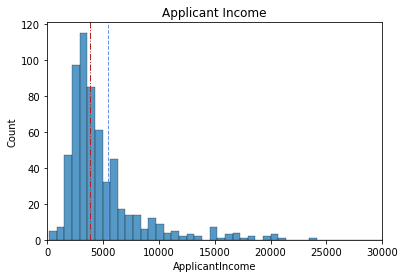

In [64]:
fig, ax = plt.subplots()
sns.histplot(data['ApplicantIncome'],ax=ax)
plt.axvline(data['ApplicantIncome'].mean(), 
            color='cornflowerblue', 
            linestyle='dashed', 
            linewidth=1,
            label='mean')
plt.axvline(df['ApplicantIncome'].median(), 
            color='firebrick', 
            linestyle='dashdot', 
            linewidth=1,
            label='median')

ax.set_xlim(0,30000)
plt.title('Applicant Income')
plt.show()

### From above graph we can see mean > median, Its a right skewed histogram.

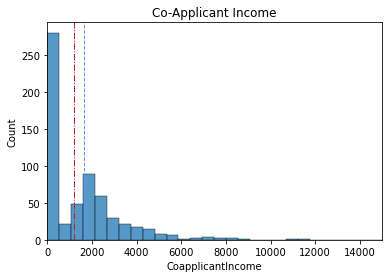

In [139]:
fig, ax = plt.subplots()
sns.histplot(df['CoapplicantIncome'],ax=ax)
plt.axvline(df['CoapplicantIncome'].mean(), 
            color='cornflowerblue', 
            linestyle='dashed', 
            linewidth=1,
            label='mean')
plt.axvline(df['CoapplicantIncome'].median(), 
            color='firebrick', 
            linestyle='dashdot', 
            linewidth=1,
            label='median')
ax.set_xlim(0,15000)
plt.title('Co-Applicant Income')
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [65]:
#get columns whose data type is categorical
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical.remove('Loan_ID')

categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [66]:
for i in categorical:
    print(df[i].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [67]:
for j in categorical:
    nuniques = df[j].value_counts()
    print(nuniques)

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


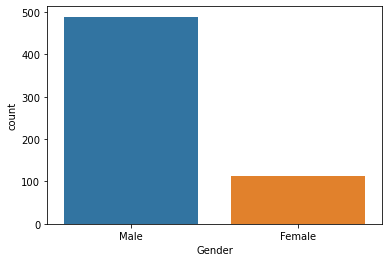

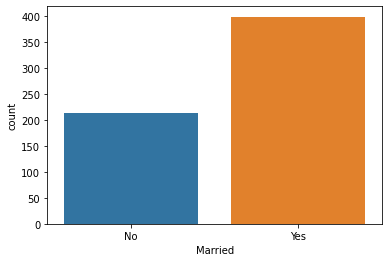

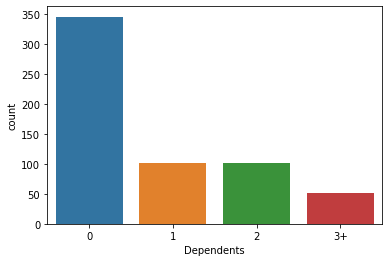

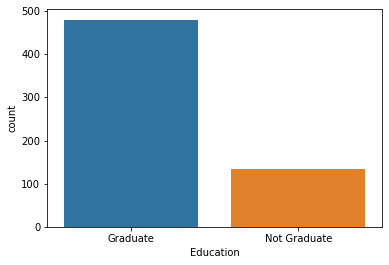

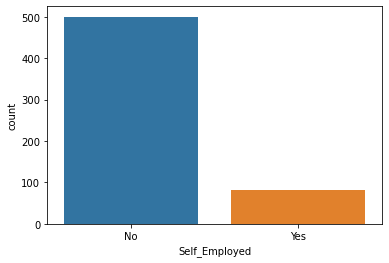

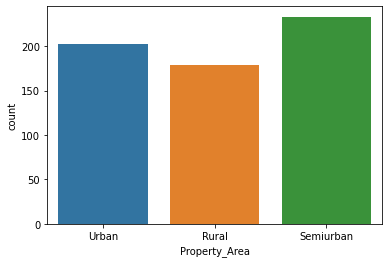

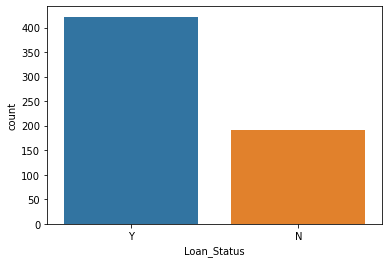

In [68]:
for j in categorical:
    sns.countplot(x=df[j])
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.

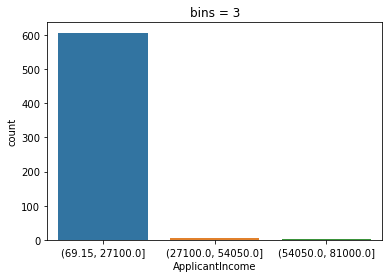

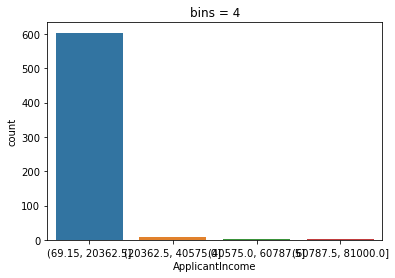

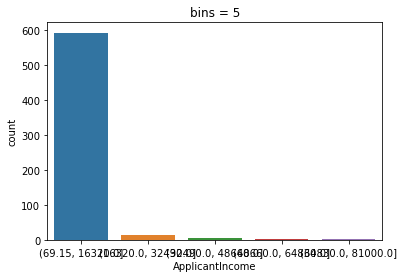

In [69]:
for i in range(3,6):
    sns.countplot(x=pd.cut(data['ApplicantIncome'],bins=i)).set_title('bins = {}'.format(i))
    plt.show()


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

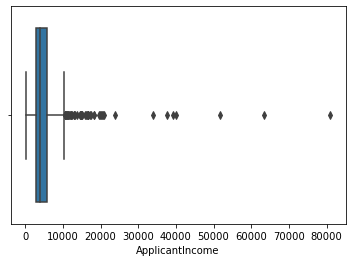

In [70]:
sns.boxplot(x='ApplicantIncome', data=data)

Look at the distribution of income segregated by Education

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

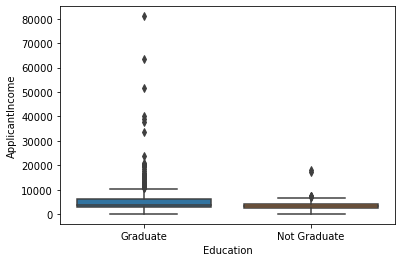

In [71]:
sns.boxplot(x='Education',y='ApplicantIncome',data=data)

Look at the histogram and boxplot of LoanAmount

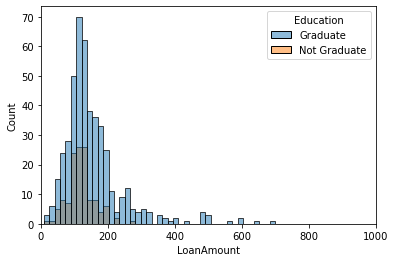

In [72]:
fig, ax = plt.subplots()
sns.histplot(x=df['LoanAmount'],hue=df['Education'])
ax.set_xlim(0,1000)
plt.show()

### Higher education level trends to have higher loan amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Education'>

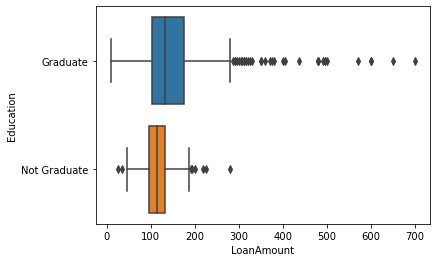

In [73]:
sns.boxplot(x='LoanAmount',y='Education',data=data)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

/Users/vickichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount'>

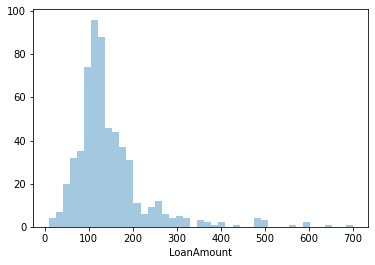

In [74]:
#Drop Missing Values in Loan amount
sns.distplot(data.LoanAmount.dropna(),kde=False)

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [75]:
pd.pivot_table(data,values='LoanAmount',index=['Education','Self_Employed','Married','Gender'],columns='Credit_History')

Credit_History                                    0.0         1.0
Education    Self_Employed Married Gender                        
Graduate     No            No      Female  108.800000  115.615385
                                   Male    126.461538  140.460317
                           Yes     Female  120.000000  140.166667
                                   Male    183.320000  155.606936
             Yes           No      Female  133.000000  124.500000
                                   Male    189.500000  129.444444
                           Yes     Female  195.500000  600.000000
                                   Male    177.000000  181.096774
Not Graduate No            No      Female   80.000000   94.875000
                                   Male    114.333333   93.421053
                           Yes     Female  178.000000  100.000000
                                   Male    128.062500  123.000000
             Yes           No      Female         NaN  137.333333
                                   Male    158.000000  118.000000
                           Yes     Female         NaN  138.000000
                                   Male    165.000000  122.857143

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

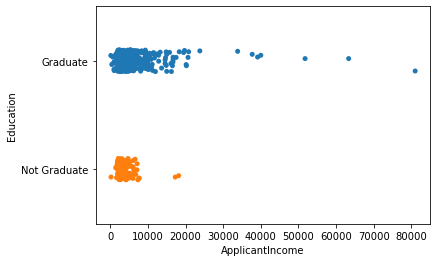

In [76]:
sns.stripplot(x='ApplicantIncome',y='Education',data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

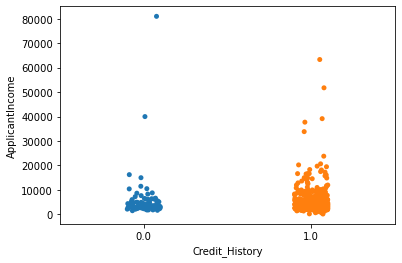

In [77]:
sns.stripplot(y='ApplicantIncome',x='Credit_History',data=data)

<AxesSubplot:xlabel='LoanAmount', ylabel='Dependents'>

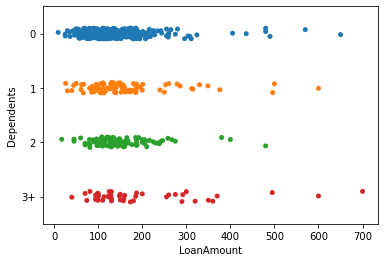

In [78]:
sns.stripplot(x='LoanAmount',y='Dependents',data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

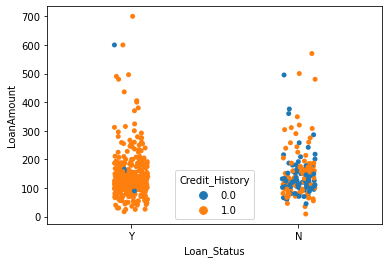

In [79]:
sns.stripplot(y='LoanAmount',x='Loan_Status',hue='Credit_History',data=data)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [80]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical.remove('Loan_ID')

categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [81]:
from sklearn.impute import SimpleImputer

In [82]:
cat_df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [83]:
# numerical data
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [84]:
# impute (fill) missing values 
# numerical: mean
# categorical: mode

fill_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_mean_fill = pd.DataFrame(fill_mean.fit_transform(num_df), columns=num_df.columns)
df_mode_fill = pd.DataFrame(fill_mode.fit_transform(cat_df), columns=cat_df.columns)

df_fill = pd.concat([df_mode_fill, df_mean_fill], axis=1)

In [85]:
df_fill.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,0.0,146.412162,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4583.0,1508.0,128.000000,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,0.0,66.000000,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2583.0,2358.0,120.000000,360.0
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,0.0,141.000000,360.0


In [86]:
df_fill.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [87]:
df_fill.to_csv(r'/Users/vickichen/Desktop/mini-project-IV/data/dataclean.csv', index=False)

In [88]:
dataclean = pd.read_csv("/Users/vickichen/Desktop/mini-project-IV/data/dataclean.csv")

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

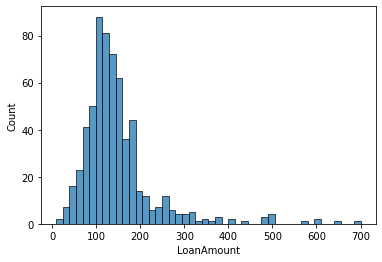

In [89]:
sns.histplot(dataclean['LoanAmount'])

<AxesSubplot:xlabel='log_loan_Amount', ylabel='Count'>

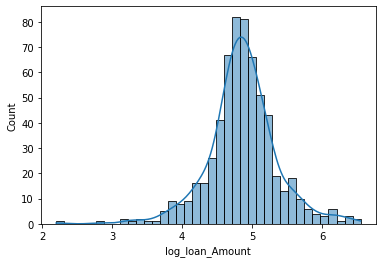

In [90]:
dataclean['log_loan_Amount'] = np.log(dataclean['LoanAmount'])
sns.histplot(data=dataclean, x="log_loan_Amount", kde=True)

<AxesSubplot:xlabel='log_total_income', ylabel='Count'>

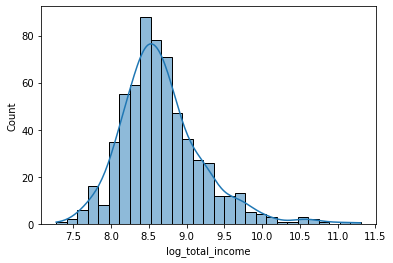

In [91]:
dataclean['total_income'] = dataclean['ApplicantIncome'] + dataclean['CoapplicantIncome']
dataclean['log_total_income'] = np.log(dataclean['total_income'])
sns.histplot(data=dataclean, x="log_total_income", kde=True)

## 4. Building a Predictive Model

In [92]:
dataclean.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,log_loan_Amount,total_income,log_total_income
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,0.0,146.412162,360.0,4.986426,5849.0,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4583.0,1508.0,128.000000,360.0,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,0.0,66.000000,360.0,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2583.0,2358.0,120.000000,360.0,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,0.0,141.000000,360.0,4.948760,6000.0,8.699515


### We’re gonna use sklearn for our models , before doing that we need to turn all the categorical variables into numbers.

In [93]:
dataclean.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History       float64
Property_Area         object
Loan_Status           object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
log_loan_Amount      float64
total_income         float64
log_total_income     float64
dtype: object

In [94]:

train=pd.read_csv("/Users/vickichen/Desktop/W08PROJECT/mini-project-IV/data/trainclean.csv")

In [95]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History       float64
Property_Area         object
Loan_Status           object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
log_loan_Amount      float64
total_income         float64
log_total_income     float64
dtype: object

In [96]:
from sklearn.preprocessing import LabelEncoder
categorical= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in categorical:   
        data[i] = encoder.fit_transform(data[i]) 
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [97]:
dataclean.to_csv(r'/Users/vickichen/Desktop/mini-project-IV/data/trainclean.csv', index=False)

In [98]:
train=pd.read_csv("/Users/vickichen/Desktop/mini-project-IV/data/trainclean.csv")

In [99]:
from sklearn.preprocessing import LabelEncoder
categorical= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
encoder= LabelEncoder()
for i in categorical:   
        train[i] = encoder.fit_transform(train[i]) 
train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
log_loan_Amount      float64
total_income         float64
log_total_income     float64
dtype: object

In [100]:
train.to_csv(r'/Users/vickichen/Desktop/mini-project-IV/data/testclean.csv', index=False)

In [101]:
test=pd.read_csv("/Users/vickichen/Desktop/mini-project-IV/data/testclean.csv")

In [102]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
log_loan_Amount      0
total_income         0
log_total_income     0
dtype: int64

In [103]:
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [104]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [105]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [107]:
data = data.sample(frac=1)

In [108]:
X = data.drop(columns=['Loan_ID','Loan_Status'])
y = data['Loan_Status']

In [109]:
LE = LabelEncoder()
y = LE.fit_transform(y)
# y

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=123)

In [111]:
numerical = list(X.dtypes[X.dtypes != 'object'].index)
remove = {'Credit_History'}
numerical = [e for e in numerical if e not in remove]
categorical = list(X.dtypes[X.dtypes == 'object'].index)
categorical.extend(['Credit_History'])

In [112]:
numerical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Property_Area']

In [113]:
categorical

['Credit_History']

In [114]:
def log_transform(x):
    return np.log(x + 1)
transformer = FunctionTransformer(log_transform)

In [115]:
num_pipe = make_pipeline(
    transformer,
    StandardScaler(),
    SelectKBest(k=2)
)

In [116]:
cat_pipe = make_pipeline(
    OrdinalEncoder(),
)
# handle_unknown='use_encoded_value'

In [117]:
preprocessor = ColumnTransformer(
    transformers = [
        ('continuous', num_pipe, numerical),
        ('categorical', cat_pipe, categorical),
    ]
)

In [ ]:
clean = FunctionTransformer(Clean)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:

model_pipe = imblearn.pipeline.Pipeline(steps = [
    ('clean', clean),
    ('preprocess', preprocessor),
    ('SMOTE', SMOTE(sampling_strategy=0.75, 
                    n_jobs=-1, 
                    random_state=123)),
    ('random_under', RandomUnderSampler(sampling_strategy=0.8,
                                       random_state = 123)),
    ('clf', XGBClassifier(objective = 'reg:logistic',
                     learning_rate = 0.1,
                     eval_metric = 'logloss',
                     colsample_bytree = 1,
                     use_label_encoder = False,
                     max_depth = 10, 
                     reg_alpha = 10,
                     n_estimators = 100,
                     n_jobs=-1))
])

In [ ]:
model_pipe.fit(x_train, y_train)

train_score = cross_val_score(model_pipe,x_train,y_train,cv=5)
print(f'Train set score: {train_score}')

In [ ]:
y_pred = model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

In [ ]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print(metrics.roc_auc_score(y_test, y_pred))

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
param_grid = {'clf__objective': ['reg:logistic','binary:logistic'],
              'clf__n_estimators': [50,100,150,200,250,300,350,400,450,500], 
              'clf__learning_rate': [0.003, 0.01,0.03, 0.1, 0.3],
              'clf__reg_alpha': [1,3,5,7,9,11],
              'SMOTE__sampling_strategy': ['minority',0.5,0.6,0.7,0.8,0.9,1],
              'random_under__sampling_strategy': ['majority',0.5,0.6,0.7,0.8,0.9,1]
             }


random = RandomizedSearchCV(model_pipe, param_distributions=param_grid,n_iter=100, cv=5,n_jobs=-1,verbose=1,random_state=123)
random.fit(x_train, y_train)

best_hyperparams = random.best_params_
best_acc = random.score(x_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

In [ ]:
param_grid = {'clf__objective': ['reg:logistic','binary:logistic'],
              'clf__n_estimators': [300,350,400,450,500], 
              'clf__learning_rate': [0.01, 0.03,0.1],
              'clf__reg_alpha': [9,10,11,12],
              'SMOTE__sampling_strategy': ['minority',0.5,0.6],
              'random_under__sampling_strategy': ['majority',0.5,0.6,0.7]
             }

grid = GridSearchCV(model_pipe, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(x_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

In [ ]:
best_pred=best_model.predict(x_test)

In [ ]:
best_accc = metrics.accuracy_score(y_test, best_pred)
print(f'Test set accuracy: {best_accc}')
print(metrics.confusion_matrix(y_test,best_pred))
print(metrics.classification_report(y_test, best_pred))

In [ ]:
print(metrics.roc_auc_score(y_test, best_pred))

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, best_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

## SEE app.py attached. kept getting error using FLASK, not sure how to fix it, needed to talk to a mentor. 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: on
---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
Input In [5], in <cell line: 3>()
      1 api.add_resource(Scoring, '/scoring')
      3 if __name__ == '__main__':
----> 4     app.run(debug=True, host='0.0.0.0', port=5000)

File ~/opt/anaconda3/lib/python3.9/site-packages/flask/app.py:990, in Flask.run(self, host, port, debug, load_dotenv, **options)
    987 from werkzeug.serving import run_simple
    989 try:
--> 990     run_simple(host, port, self, **options)
    991 finally:
    992     # reset the first request information if the development server
    993     # reset normally.  This makes it possible to restart the server
    994     # without reloader and that stuff from an interactive shell.
    995     self._got_first_request = False

File ~/opt/anaconda3/lib/python3.9/site-packages/werkzeug/serving.py:991, in run_simple(hostname, port, application, use_reloader, use_debugger, use_evalex, extra_files, exclude_patterns, reloader_interval, reloader_type, threaded, processes, request_handler, static_files, passthrough_errors, ssl_context)
    989 s = socket.socket(address_family, socket.SOCK_STREAM)
    990 s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
--> 991 s.bind(server_address)
    992 s.set_inheritable(True)
    994 # If we can open the socket by file descriptor, then we can just
    995 # reuse this one and our socket will survive the restarts.

OSError: [Errno 48] Address already in use

In [132]:

json_data = {
    'Gender': 'Male',
    'Married': 'No',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5941,
    'CoapplicantIncome': 4232,
    'LoanAmount': 296,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 'Semiurban'
}